In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fftpack import dct
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

In [11]:
import matplotlib.pyplot as plt
import cv2

# Function to display an image
def display_image(image_path, title="Image"):
    # Load the image
    image = cv2.imread(image_path)
    # Convert BGR (OpenCV default) to RGB for correct color display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(title)
    plt.show()


In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
# Function to load image and preprocess for CLIP
def load_image_for_clip(image_path):
    image = Image.open(image_path).convert("RGB")  # Open and convert to RGB
    inputs = processor(images=image, return_tensors="pt")  # Preprocess image for CLIP
    return inputs["pixel_values"]

In [4]:
# Function to get CLIP embeddings
def get_clip_embedding(image_tensor):
    with torch.no_grad():
        embeddings = model.get_image_features(image_tensor)  # Extract CLIP image embeddings
    return embeddings.cpu().numpy().squeeze()

In [5]:
# Function to compute DCT on CLIP embeddings
def compute_dct_on_embedding(embedding):
    # Apply DCT to the embedding and get the magnitudes
    dct_transformed = dct(dct(embedding.T, norm='ortho').T, norm='ortho')  # 2D DCT
    dct_magnitude = np.abs(dct_transformed)  # Take magnitude
    return dct_magnitude

In [6]:
# Plot frequency randomness based on DCT of CLIP embeddings
def plot_frequency_randomness(image_path):
    # Load image and get CLIP embedding
    image_tensor = load_image_for_clip(image_path)
    embedding = get_clip_embedding(image_tensor)

    # Compute DCT magnitudes
    dct_magnitude = compute_dct_on_embedding(embedding)

    # Flatten DCT values for plotting
    dct_values = dct_magnitude.flatten()

    # Plot histogram of DCT values
    plt.figure(figsize=(10, 6))
    plt.hist(dct_values, bins=50, color='blue', alpha=0.7)
    plt.yscale('log')  # Use log scale for better visualization
    plt.xlabel("DCT Magnitude (Frequency Strength)")
    plt.ylabel("Frequency (Log Scale)")
    plt.title("Frequency Domain Analysis - Randomness via DCT on CLIP Embeddings")
    plt.grid(True)
    plt.show()


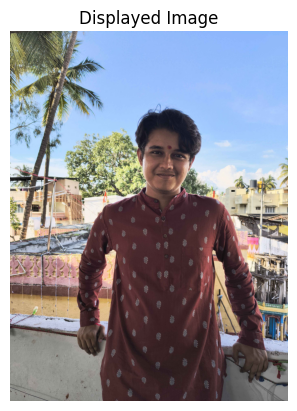

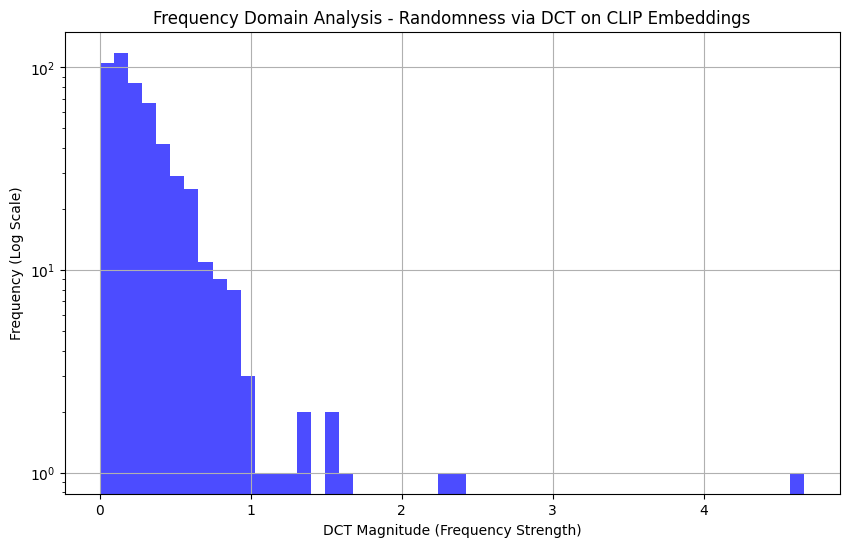

In [13]:
image_path = "/content/real 4.jpg"
display_image(image_path, title="Displayed Image")
plot_frequency_randomness(image_path)

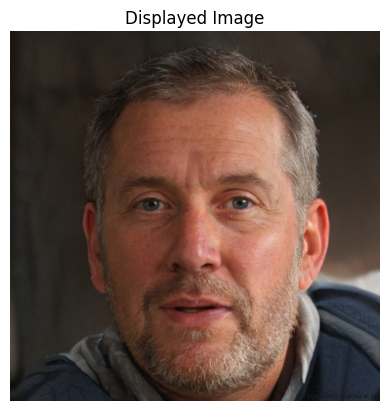

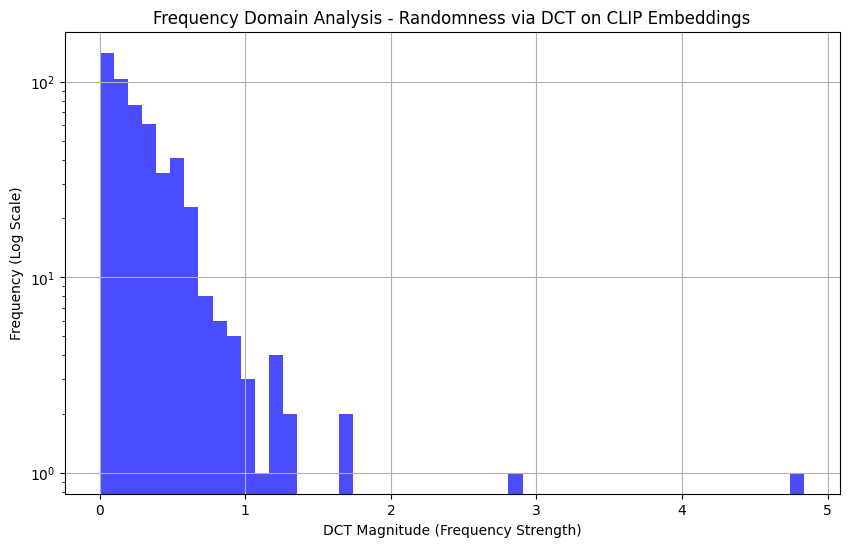

In [12]:
image_path = "/content/fake 1.jpg"
display_image(image_path, title="Displayed Image")
plot_frequency_randomness(image_path)